<a href="https://colab.research.google.com/github/Terry-Migwi/Moringa_Datascience_Core_Week_8_IP/blob/master/Moringa_Data_Science_Core_W8_IP_2020_08_Terry_Migwi_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the question

### Specifying the question

This study is attributed to a clinical camp conducted by Nairobi Hospital to test for hypothyroidism. The data collected focussed on thyroid patients.
 
The aim of the study is to determine whether or not the patient's symptoms indicate that the patient has hypothyroidism using the healthcare datasets provided by building the following models:

1.   Decision Trees
2.   Support Vector Machines (SVM)


### Defining the metrics for success

As this study is on healthcare, we cannot stress enough on the importance of precise results. Misclassification could lead to misdiagnosis of a patient and the consequences of this are dire. For this reason, this study wil only be considered successful if the following is achieved:
*   For the decision trees, employ different techniques to optimize the model and alleviate overfitting. Have an accuracy score of less than 0.99

*   For SVM, build a model with a low RMSE score of less than 0.1


###Understanding the context

Thyroid  is one  of the  most common  disease found  in human  beings which  cause  many other  side  effects in the human  body. It is of two types,hypothyroid and hyperthyroid which are explained below:

*   Hypothyroid causes hypothyroidism which is simply  not  enough  thyroid  hormone
*   Hyperthyroid causes hyperthyroidism which is too much thyroid hormone.

Either imbalance affects the metabolism in the body. Hypothyroidism  causes a reduction in stroke volume and heart rate causing lowered cardiac output with a decrease in heart sounds. Hypothyroidism is a condition that underlies  most chronic degenerative diseases and hormone irregularities and results in a weakened immune system. Hyperthyroidism causes the body’s processes to speed up hence causing nervousness, anxiety, rapid heartbeat, hand tremor, excessive sweating, weight loss, and sleep problems, among other symptoms.

This study will focus on hypothyroidism. To prevent the conditions mentioned above, prior diagnosis of Thyroid is very important and  beneficial for the  betterment of human life, and an early diagnosis and detection of hypothyroidism can help human beings fight against this disease.


###Recording the experimental design

The following steps wil be taken in this study:

1.   Importing libraries and loading datasets
1.   Checking the dataset and the components
1.   Checking for possible anomalies in the dataset
1.   Conducting necessary data preparation procedures
1.   Conducting Exploratory Data Analysis and documenting the findings
1.   Building a baseline model that we will use to compare our models to
1.   Building decision trees and optimizing the trees for the best results
1.   Determining appropriate data for SVM and training the data to the SVM model



##2. Reading the data

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading dataset
hypothyroid = pd.read_csv("/content/hypothyroid.csv")


In [3]:
# previewing the top of the dataset
hypothyroid.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [4]:
# previewing the bottom of the dataset
hypothyroid.tail()

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[5 rows x 26 columns]

In [5]:
# size of the dataset
hypothyroid.shape

display('There is {} observations with {} features'.format(hypothyroid.shape[0], hypothyroid.shape[1]))


'There is 3163 observations with 26 features'

In [6]:
# checking the columns
hypothyroid.columns.values.tolist() #converting column names to a list

['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

**Column descripion** 

*   status: whether the patient has tested positive or negative for hypothyroidism
*   age: the age of the patient
*   sex: the gender of the patient
*   on_thyroxine: whether the patient is on the thyroxine drug or not
*   query_on_thyroxine: whether the patient has queries on the thyroxine drug or not 
*   on_antithyroid_medication: whether the patient is on medication to decrease release of thyroid hormones or not
*   thyroid_surgery: whether the patient has undergone thyroid surgery or not
*   query_hypothyroid: whether a patient has queries on hypothyroidism(under-active thyroid) hormone or not
*   query_hyperthyroid: whether the patient has queries on hyperthyroism(over-active thyroid) or not
*   pregnant: whether the patient is pregnant or not
*   sick: whether the patient is sick or not
*   tumor: whether the patient has had a tumor or not
*   lithium: whether the patient is on lithium drugs or not
*   goitre: whether the patient has goitre or not
*   TSH_measured: Whether the patient's levels of thyroid stimulating hormone have been measured or not
*   TSH : level of thyroid stimulating hormones in the patient
*   T3_measured:whether the patient's levels of triiodothyronine hormone have been measured or not
*   T3: levels of triiodothyronine hormone in the patient
*   TT4_measured: whether the patient's levels of total thyroxine hormones has been measured or not
*   TT4: the levels of the total thyroxine hormones in the patient
*   T4U_measured: whether the patient's thyroid utilization rate has been tested or not 
*   T4U: the rate of thyroid utilization in a patient
*   FTI_measured: _free thyroid index_: whether the patient's thyroid binding capacity has been measured or not
*   FTI: thyroid binding index of a patient
*   TBG_measured: whether a patient's Thyroxine-binding globulin has been measured or not
*   TBG: the level of thyroxine binding globulin in a patient



In [7]:
# checking the data types
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

### Data Relevance

The dataset provided contains 26 features that are associated with hypothyroidism. After doing some research, I found out that some the features provided are connected to hypothyroidism as follows: 

*   The thyroid creates two thyroid hormones, triiodothyronine (T3) and thyroxine (T4). These regulate metabolism
*   The production of thyroid hormones is regulated by thyroid-stimulating hormone (TSH). TSH ensures that enough thyroid hormones are made to meet the needs of the body.If the TSH reading is above normal, the patient may have hypothyroidism. If TSH levels are below normal, the patient may have hyperthyroidism or hypothyroidism
*   Some risk factors that could cause hypothyroidism include presence of a goitre, use of medication known to affect thyroid function, pregnancy (during pregnancy, iodine requirements increase hence pregnent women have a higher risk of thyroid problems)
*   Iodine is an essential mineral for thyroid function. Iodine deficiency is one of the most common causes of goiter development, or abnormal enlargement of the thyroid gland
*  Some drugs such as lithium can interfere with thyroid hormone production.
*  Most of the protein-bound T3 and T4 in your body bind to thyroxine-binding globulin(TBG). The serum TBG level test measures the amount of TBG in your blood. This can help doctors assess thyroid problems
*   Gender and age have substantial influence on thyroid function

Although most of these terms are biological, it is clear that the features provided have a connection with having hypothyroidism hence we conclude that the data is relevant for this study. A concern would be the number of null values in the dataset which have to be dealt with so we can make the most out of this data.


###External Datasource Validation

For this dataset, the unit of measurement for the hormone levels is not indicated hence it was a bit difficult to validate the range of the hormone levels. 

From the data, I noted that TSH values ranged from 0 - 500. However, from research I found out that The TSH has a normal test range between 0.4 and 4.0 milli-international units of hormone per liter of blood (mIU/L). This is quite low as compared to what we have hence I made an assumption that the values provided had been converted to a more interepretable form. e.g instead of recording levels per litre of blood, they probably recorded the levels per how much blood an individual has in total

##3. Data Preparation

### Checking for completeness


In [8]:
# checking for null values
hypothyroid.isnull().values.any()

False

The isnull function returns no null values, however, from previewing the dataset we observe some values with ?. Hence we replace these values with nan so they can be recognized as null values

In [9]:
# replacing the ? values with nan
hypothyroid.replace('?', np.nan, inplace= True)


In [10]:
# now checking for null values
hypothyroid.isnull().values.any()

True

In [11]:
hypothyroid.isnull().values.sum()


5329

There are 5329 null values

In [12]:
# checking the total number of null values per column
hypothyroid.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

There are 8 columns with null values with the TBG column having the most while the sex column has the least number of null values.

#### Dealing with Missing Values


#### Missing values in categorical columns

The column sex contains 73 records of missing values that we would not like to drop hence we shall investigate the columns and from what we find employ different methods of dealing with these values. First, only females get pregnant hence the column 'pregnancy' should contain only females hence we shall look into this to ensure it is so.

In [13]:
pregnant =hypothyroid[hypothyroid['pregnant'] == 't']
pregnant.shape


(63, 26)

There are 63 records of people who are pregnant in the dataset

In [14]:
# confirming there are no males in the pregnancy dataframe
male_pregnancy = pregnant[pregnant['sex'] == 'M'] 
male_pregnancy

Empty DataFrame
Columns: [status, age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre, TSH_measured, TSH, T3_measured, T3, TT4_measured, TT4, T4U_measured, T4U, FTI_measured, FTI, TBG_measured, TBG]
Index: []

There are no male patients who are pregnant in our data which means our data is valid. We now find any missing values in the sex column in the preganant dataframe and replace them with females

In [15]:
pregnant['sex'].isnull().any()

True

We have records that contain missing values in the sex column. We investigate how many records these missing values are.

In [16]:
# checking for null values in the pregnancy column
pregnant['sex'].isnull().sum()

1

We have only one missing value in the sex column. We replace this value with female

In [17]:
# we locate the records with true pregnancies then replace these values with f to represent female 
hypothyroid.loc[hypothyroid['pregnant'] == 't', 'sex'] = 'F'  


In [18]:
# checking for remaining null values in the sex column in the entire dataset

hypothyroid.isnull().sum()

status                          0
age                           446
sex                            72
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

The sex column is now down to 72 records, this is quite a number. Lets explore the data a little bit more to find out how best to deal with this.

We find out how many male patients we have and how many female patients we have.

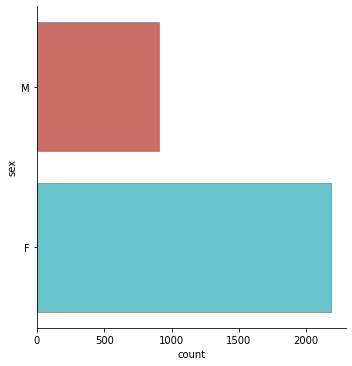

In [19]:
sns.catplot(y="sex", kind="count",
            palette="hls", edgecolor=".6",
            data=hypothyroid);

A big number of the patients are females. However, we would not like to assume that all the null values in the sex column were all females hence we will check if there are records that contain more than 4 null values then drop these records as these will be too many values to be missing in just one record. 

In [20]:
hypothyroid = hypothyroid.dropna(thresh=4)
hypothyroid.isnull().sum()

status                          0
age                           446
sex                            72
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

There were no records that were dropped hence all records have less than 4 null values. At this point, the only options we have for the sex column is to either impute the missing values with the mode in that column, which in this case is females or drop the null values. Since the missing values are 72 which is not a huge number compared to the entire dataset, I will drop them as I don't want to assume that they were all records for females or even males if I were to replace.

In [21]:
hypothyroid = hypothyroid.dropna(subset=['sex'])

hypothyroid.isnull().sum()

status                          0
age                           391
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           456
T3_measured                     0
T3                            683
TT4_measured                    0
TT4                           244
T4U_measured                    0
T4U                           243
FTI_measured                    0
FTI                           242
TBG_measured                    0
TBG                          2836
dtype: int64

####Missing values in the age column

We will investigate the age column first then determine how best to deal with this missing values. We first need to convert the data to appropriate data types

In [22]:
# coverting age to float datatype
hypothyroid['age'] = hypothyroid['age'].astype('float')

# converting sex and status columns to integers
hypothyroid.loc[hypothyroid.sex == 'F', 'sex'] = 1
hypothyroid.loc[hypothyroid.sex == 'M', 'sex'] = 0
hypothyroid['sex'] = hypothyroid['sex'].astype('int')

hypothyroid.loc[hypothyroid.status == 'hypothyroid', 'status'] = 1
hypothyroid.loc[hypothyroid.status == 'negative', 'status'] = 0
hypothyroid['status'] = hypothyroid['status'].astype('int')

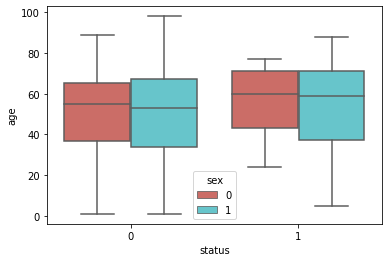

In [23]:
# boxplots to determine how the age varies with status and sex
sns.boxplot(x='status', y='age', hue='sex', data=hypothyroid, palette = 'hls')

# sns.catplot(x="status", y="age", hue="sex", kind='box', data=hypothyroid);



From the graph above, we can see that for people who tested negative(0) for hypothyroidism, the mean age for the males(0) was around 55, and 50 for the females(1). For the people who tested positive(1) for hypothyroidism the mean age for both males and females was around 56. We shall create a function to impute the missing values in the age columns with these mean values

In [24]:
def age_approx(cols):
  age = cols[0]
  sex = cols[1]
  status = cols[2]
  if pd.isnull(age):
    if sex == 0 & status == 0:
      return 55
    elif sex == 1 & status == 0:
      return 50
    elif status == 1:
      return 56

# applying the function
# hypothyroid['age'] = hypothyroid[['age', 'status', 'sex']].apply(age_approx, axis = 1)

The function didn't work as I would have loved to hence we will impute the age with the mean value of all the age values recorded.

In [25]:
# imputing the null values in age column with the mean

hypothyroid['age'] = hypothyroid['age'].fillna((hypothyroid['age'].mean()))

In [26]:
# confirming we now have no null values in the age column
hypothyroid['age'].isnull().sum()

0

In [27]:
# checking for remaining null values
hypothyroid.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           456
T3_measured                     0
T3                            683
TT4_measured                    0
TT4                           244
T4U_measured                    0
T4U                           243
FTI_measured                    0
FTI                           242
TBG_measured                    0
TBG                          2836
dtype: int64

We still have missing values in the columns that have deatls of hormone levels in the body

####Missing values in the columns with details of hormone levels

For the remaining missing values, we will first change the datatatypes to more appropriate types, check if the hormone levels were actually measured, if they were, we will impute, if they were not, we will replace these values with zeros

####Obtaining more appropriate datatypes for our columns


In [28]:
# label encoding categorical columns 
categorical_columns = ['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
                                  'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']

for column in categorical_columns:
  hypothyroid[column] = hypothyroid[column].astype('str')

# encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# instantiate label encoder object
le = LabelEncoder()

# apply le on categorical columns
hypothyroid[categorical_columns] = hypothyroid[categorical_columns].apply(lambda col:le.fit_transform(col))

In [29]:
# converting all numerical columns to float datatypes
numerical_columns = ['TSH','T3','TT4','T4U','FTI', 'TBG']

# using a for loop to convert all the columns 
for column in numerical_columns:
  hypothyroid[column] = hypothyroid[column].astype('float')

In [30]:
# label encoding categorical columns
columns = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']


hypothyroid.loc[hypothyroid.TSH_measured == 'y', 'TSH_measured'] = 1
hypothyroid.loc[hypothyroid.TSH_measured == 'n', 'TSH_measured'] = 0
hypothyroid['TSH_measured'] = hypothyroid['TSH_measured'].astype('int')

hypothyroid.loc[hypothyroid.T3_measured == 'y', 'T3_measured'] = 1
hypothyroid.loc[hypothyroid.T3_measured == 'n', 'T3_measured'] = 0
hypothyroid['T3_measured'] = hypothyroid['T3_measured'].astype('int')

hypothyroid.loc[hypothyroid.TT4_measured == 'y', 'TT4_measured'] = 1
hypothyroid.loc[hypothyroid.TT4_measured == 'n', 'TT4_measured'] = 0
hypothyroid['TT4_measured'] = hypothyroid['TT4_measured'].astype('int')

hypothyroid.loc[hypothyroid.T4U_measured == 'y', 'T4U_measured'] = 1
hypothyroid.loc[hypothyroid.T4U_measured == 'n', 'T4U_measured'] = 0
hypothyroid['T4U_measured'] = hypothyroid['T4U_measured'].astype('int')

hypothyroid.loc[hypothyroid.FTI_measured == 'y', 'FTI_measured'] = 1
hypothyroid.loc[hypothyroid.FTI_measured == 'n', 'FTI_measured'] = 0
hypothyroid['FTI_measured'] = hypothyroid['FTI_measured'].astype('int')

hypothyroid.loc[hypothyroid.TBG_measured == 'y', 'TBG_measured'] = 1
hypothyroid.loc[hypothyroid.TBG_measured == 'n', 'TBG_measured'] = 0
hypothyroid['TBG_measured'] = hypothyroid['TBG_measured'].astype('int')

In [31]:
# confirming our changes have been made
hypothyroid.head(4)


status   age  sex  on_thyroxine  ...  FTI_measured   FTI  TBG_measured  TBG
0       1  72.0    0             0  ...             1  10.0             0  NaN
1       1  15.0    1             1  ...             1  17.0             0  NaN
2       1  24.0    0             0  ...             1   0.0             0  NaN
3       1  24.0    1             0  ...             1   6.0             0  NaN

[4 rows x 26 columns]

In [32]:
# confirming we have appropriate datatypes
hypothyroid.dtypes

status                         int64
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object

In [33]:
# column_name = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
# column_values = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
# for column in column_name:
  # for column in column_values:
    # yes = hypothyroid.loc[hypothyroid[column_name]== 1]
    # no = hypothyroid.loc[hypothyroid[column_name]== 0]

# def fillnulls(df_name, column_name, column_value, measure):
  # if measure == 'yes':
    # df_name[column_name]= df_name[column_name].fillna((df_name[column_value].mean))
  # elif measure == 'no':
    # df_name[column_name] = df_name[column_value].fillna(0, inplace =True)

column_values = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for column in column_values:
  hypothyroid[column].fillna(0, inplace = True)

The hormone levels of the columns with null values were acually not measured hence we will fill the nulls with zero

In [34]:
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

We now have complete data that we can work with.

###Checking for consistency

In [ ]:
# checking for any duplicated records
hypothyroid[hypothyroid.duplicated()]

status   age  sex  on_thyroxine  ...  FTI_measured    FTI  TBG_measured  TBG
53         1  69.0    1             0  ...             1   61.0             0  0.0
66         1  62.0    0             0  ...             1   10.0             0  0.0
124        1  77.0    1             0  ...             1   49.0             0  0.0
128        1  79.0    1             0  ...             1   48.0             0  0.0
131        1  50.0    1             1  ...             1   60.0             0  0.0
...      ...   ...  ...           ...  ...           ...    ...           ...  ...
3048       0  28.0    0             0  ...             1  103.0             0  0.0
3055       0  33.0    1             0  ...             1   86.0             0  0.0
3066       0  74.0    1             1  ...             1  107.0             0  0.0
3111       0  89.0    0             0  ...             1  103.0             0  0.0
3151       0  58.0    1             0  ...             1  108.0             0  0.0

[77 rows x 26 columns]

The function returns 77 records that are duplicated, however, loking into the entire rows, these records are not entirely duplicated. Only that most of the values are 0's and 1's hence we will retain them.

### Checking for outliers

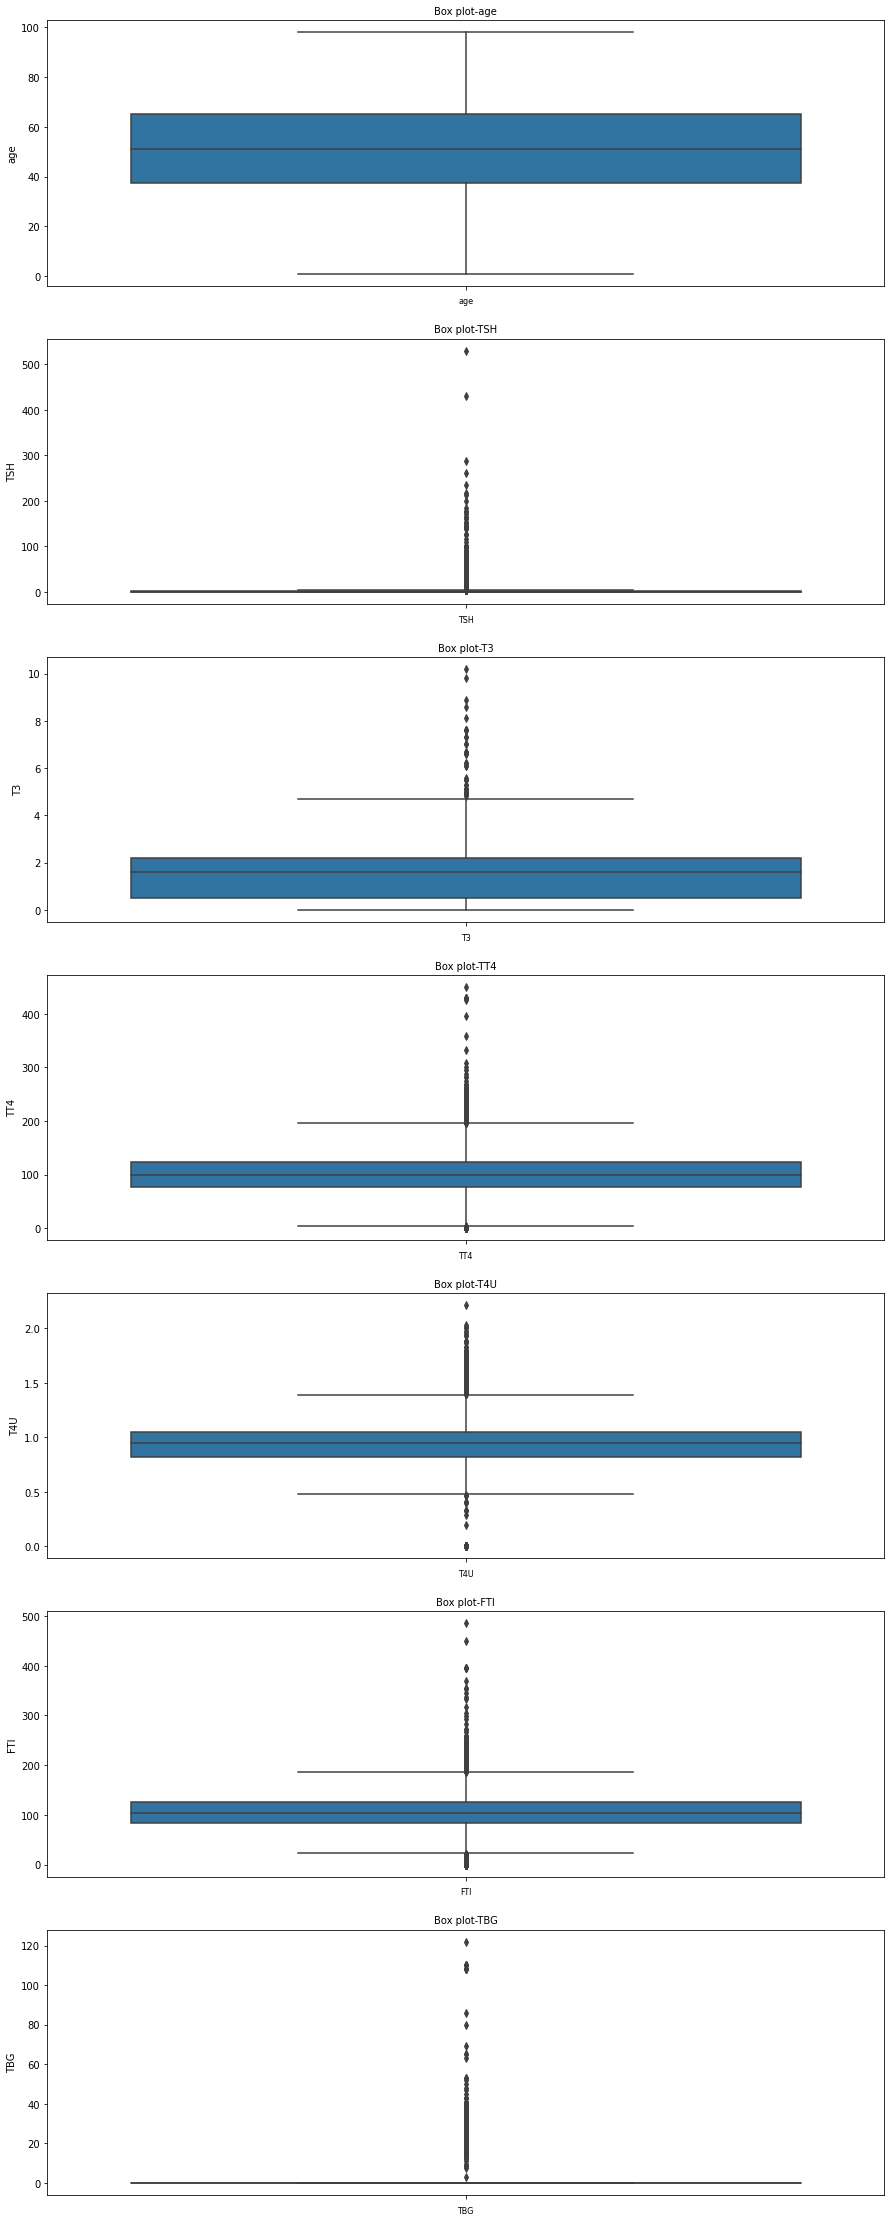

In [ ]:
columns = ['age','TSH','T3','TT4','T4U','FTI', 'TBG']

fig, ax = plt.subplots(len(columns), figsize = (15, 40))

for i, col_val in enumerate(columns):

  sns.boxplot(y= hypothyroid[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

The following are the observations from the box plots:

1.   The age column contains no outliers 
1.   For TSH column, we observe that the data points are a bit concentrated from zero to around 250, there are two observations between 250 and 300 then two observations from 300 to 500.
1.   For T3 column, the observations are between 5 and 10 which seems to be quite ok hence we will not drop any points from this column
1.   The T4U column has observations from around 0 to 2.5, with only one point above 2. We will not drop any observation from here as they don't have such a huge difference
1.   FTI column has points from 0 to 500, with only two observations above 400. These could be outliers but we will not drop them either as they could influence our models graetlty
1.   TBG column has points from 0 to 120. Where points above 60 are a bit scattered, We will retain these points as well.

As this is a healthcare dataset, all the observations are valid as every patient has different levels of hormones in the body, in fact, this is what determines if the patient's condition is normal, mild or severe and how this will affect the diagnosis. Hence we will not remove any of the outliers observed as this could be important data that will help our models with making better decisions

##4. Exploratory Data Analysis

In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 266kB 6.7MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 3.1MB 14.6MB/s 
     |████████████████████████████████| 604kB 42.9MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 296kB 49.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=73f00cb1c0488f76a9ad317bc3794258f36f18330bf3dcc0970c7fd13c2412b4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=17b8c0531aa41468fe5c278001c5c753d3febd5cfb669965d24633622258da57
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [ ]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(hypothyroid, title = "hypothyroid data report")

**Findings from the pandas profiling**

**Overview**

*   We have 19 columns that are categorical data and 8 columns that are have numerical data

*   The following columns are highly correlated with each other:      
        *T4U_measured, TT4_measured, FTI_measured and TBG measured * 

*   The following columns have a lot of zero values:
        *TSH, T3, TT4, T4U, FTI, TBG* , this could be as a result of imputing these columns with zeros

*   There are no missing or duplicate values

**Univariate Analysis**

*   The following summarizes the categorical columns:

    _status columns has more parients who tested negative for hypothyroidism as  compared to those who tested positive_

    _sex column has more females than males_

    _most patients were NOT on_thyroxine_

    _most of the patients did NOT have query_on_thyroxine_

    _most patients were NOT on_antithyroid_medication_

    _most patients have NOT had thyroid_surgery_

    _most patients have NO queries on hyperthyroid or hyperthyroid_

    _most patients are NOT pregnant, sick_

    _most patients don't have tumors, goitre_

    _most patients are NOT on lithium_

    _for most patients, the hormones TSH, T3, TT4, T4U, FTI, TBG  were not measured_ 


###Univariate Analysis

In [ ]:
# statistical summary
hypothyroid.describe()

status          age  ...  TBG_measured          TBG
count  3091.000000  3091.000000  ...   3091.000000  3091.000000
mean      0.048204    51.220000  ...      0.082498     2.566030
std       0.214233    18.039756  ...      0.275166    10.102941
min       0.000000     1.000000  ...      0.000000     0.000000
25%       0.000000    37.500000  ...      0.000000     0.000000
50%       0.000000    51.220000  ...      0.000000     0.000000
75%       0.000000    65.000000  ...      0.000000     0.000000
max       1.000000    98.000000  ...      1.000000   122.000000

[8 rows x 26 columns]

####Mean

In [ ]:
# obtaining all numerical columns

columns = ['TSH','T3','TT4','T4U','FTI', 'TBG']

for column in columns:
  print('\n')
  print(column +':' + str(hypothyroid[column].mean()))



TSH:5.064150760271755


T3:1.5046263345195718


TT4:99.86053057263022


T4U:0.9075315431899045


FTI:103.0264962795212


TBG:2.5660304108702685


####Median

In [ ]:
for column in columns:
  print('\n')
  print(column +':' + str(hypothyroid[column].median()))



TSH:0.4


T3:1.6


TT4:100.0


T4U:0.95


FTI:104.0


TBG:0.0


####Mode

In [ ]:
for column in columns:
  print('\n')
  print(column +':' + str(hypothyroid[column].mode()))



TSH:0    0.0
dtype: float64


T3:0    0.0
dtype: float64


TT4:0    0.0
dtype: float64


T4U:0    0.0
dtype: float64


FTI:0    0.0
dtype: float64


TBG:0    0.0
dtype: float64


The mode value of all the numerical columns is zeros.

#### Distribution plots

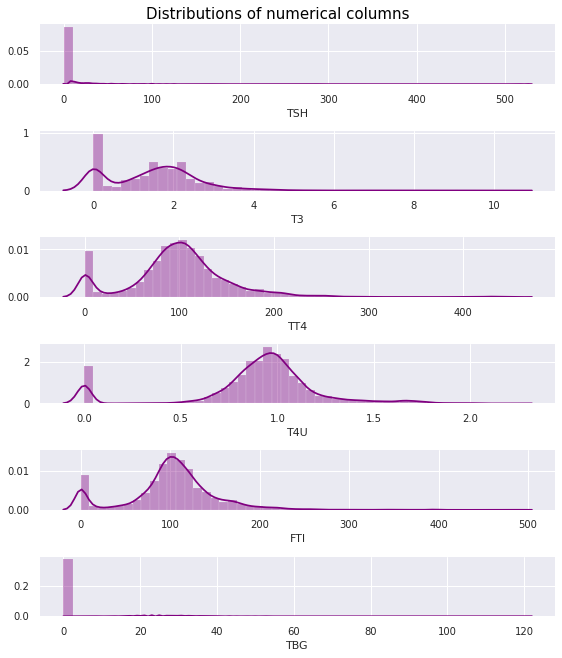

In [ ]:
columns = ['TSH','T3','TT4','T4U','FTI', 'TBG']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (8, 9))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), hypothyroid, columns):
  sns.distplot(hypothyroid[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

**Observations**

1.   TSH column seems to follow a beta distribution with a positive skew. 
1.   T3, TT4, T4U and FTI columns are all normally distributed and are bimodal. Each of these columns have one of the mode as zero and the other mode centred around the middle of the data. This could be attributed to the fact that the patients who were not measured for these hormones had no values recorded for the hormones hence were all imputed with zero values. The second mode is of people who were actually measured for the hormones and their values recorded.
1.   For the TBG column, we can't observe any distribution as most of the values are zero. This could be attributed to the fact that a most of the people were not measured for TBG hence most of the values were imputed with zeros.


#### Bar Charts

We'll use bar charts to visualize the counts of our categorical variables. This a better way to visualize the the pandas profiling report

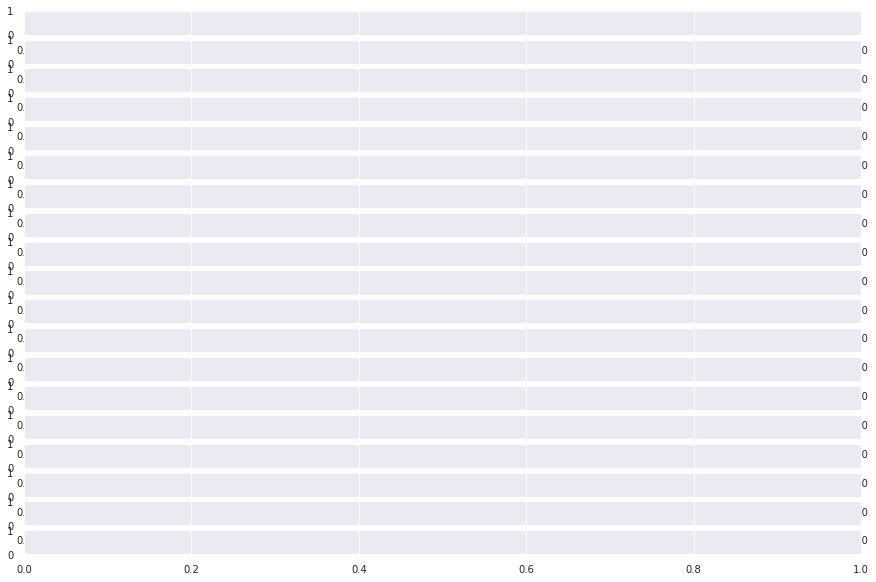

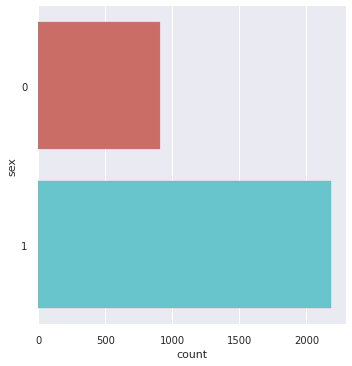

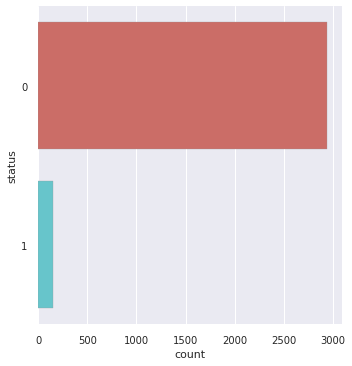

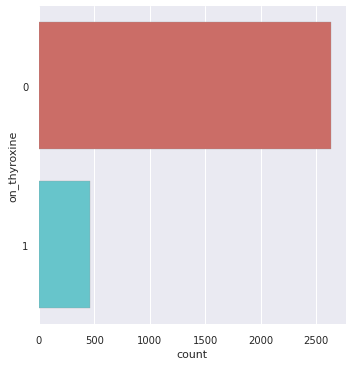

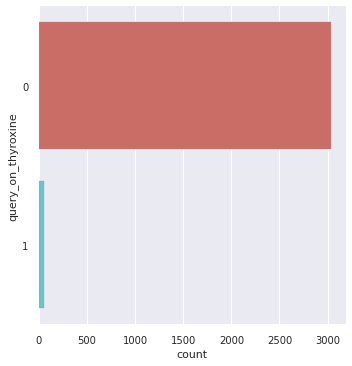

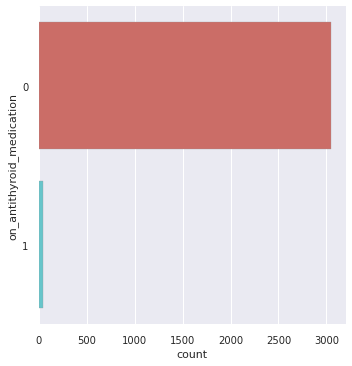

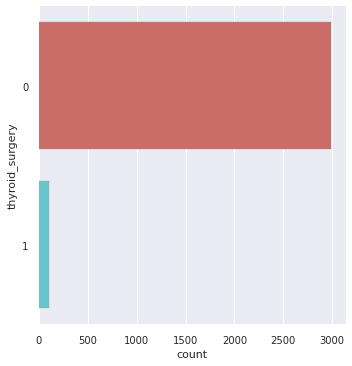

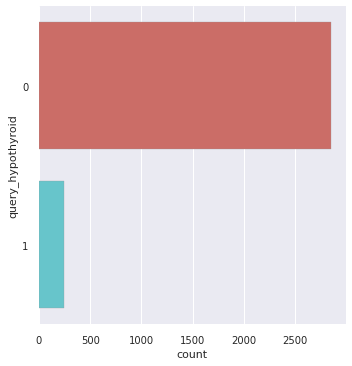

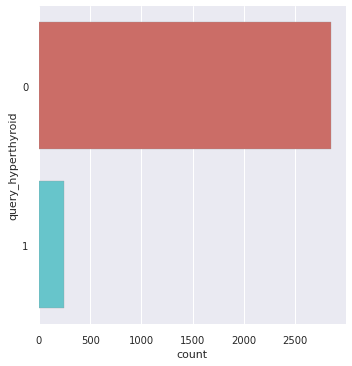

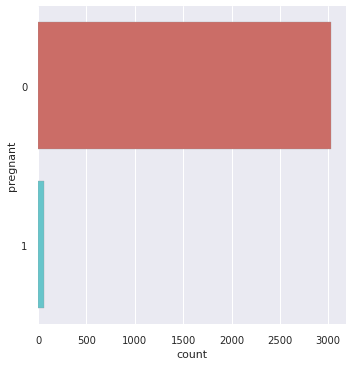

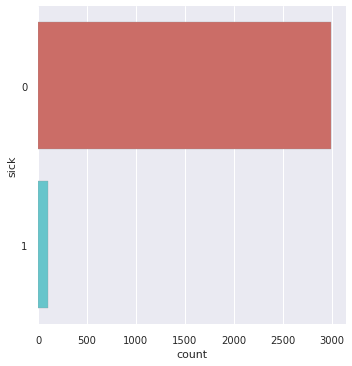

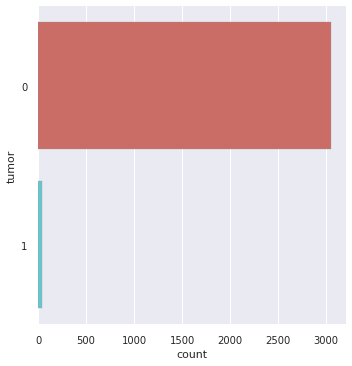

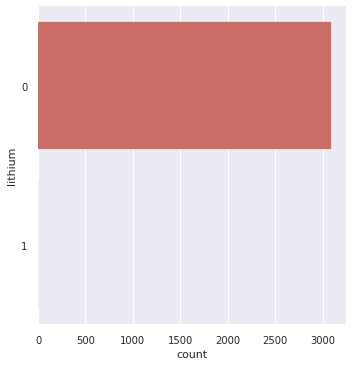

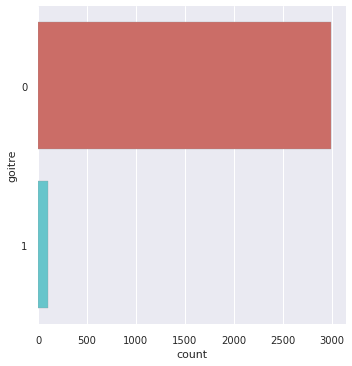

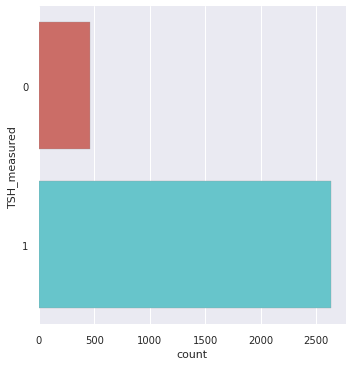

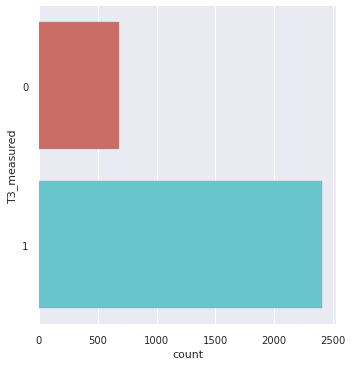

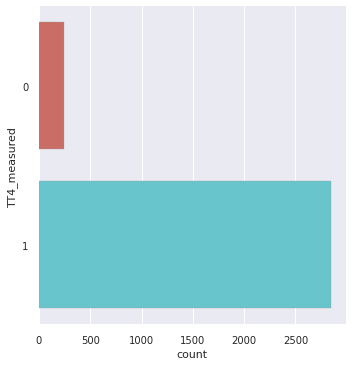

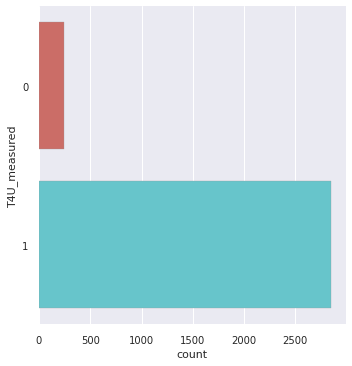

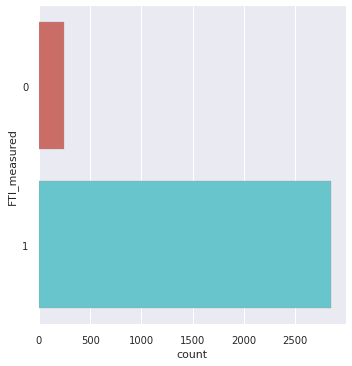

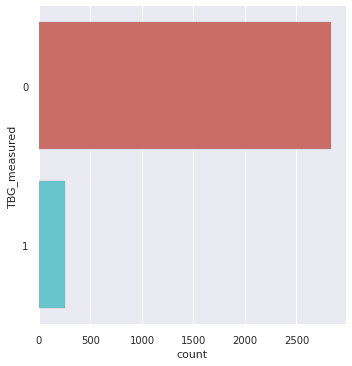

In [ ]:
categorical_columns = ['sex', 'status','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery', 
              'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre',
              'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']          

sns.set_style('darkgrid')

fig, axes = plt.subplots(len(categorical_columns), figsize=(15, 10))

for var, subplot in zip(categorical_columns, axes.flatten()):
  sns.catplot(y=var, kind="count", palette="hls", edgecolor=".6", data=hypothyroid, ax=subplot);


###Bivariate Analysis

We will use cat plots to show how each of the categorical columns relate with the status column.

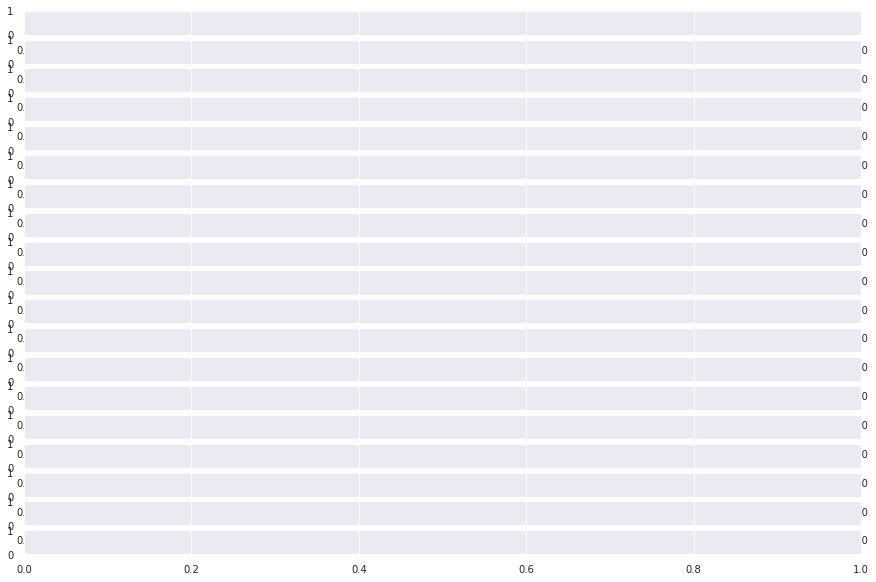

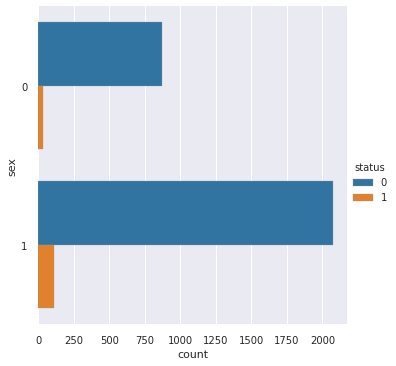

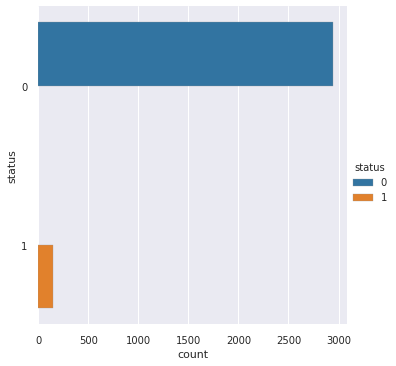

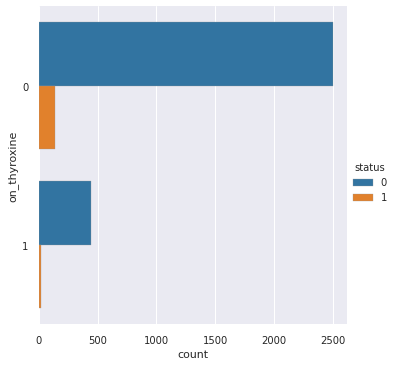

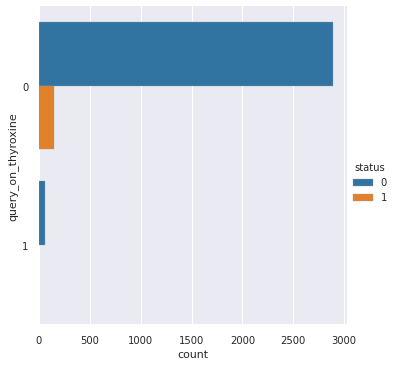

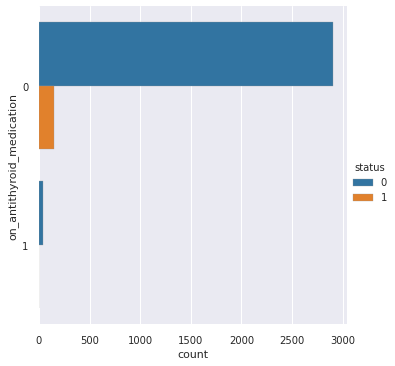

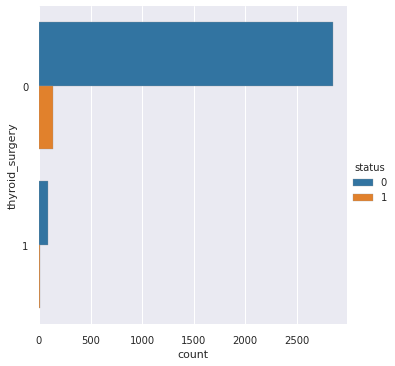

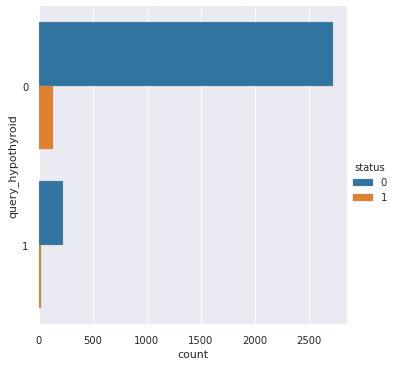

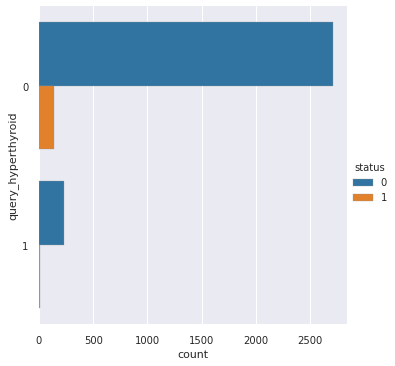

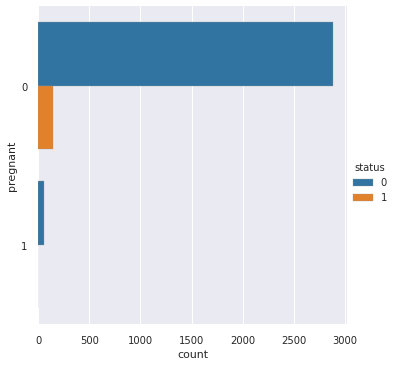

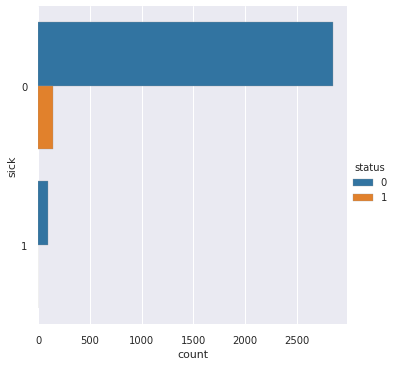

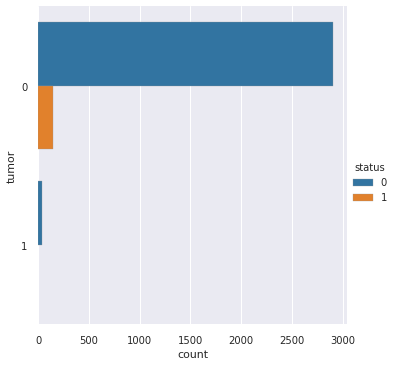

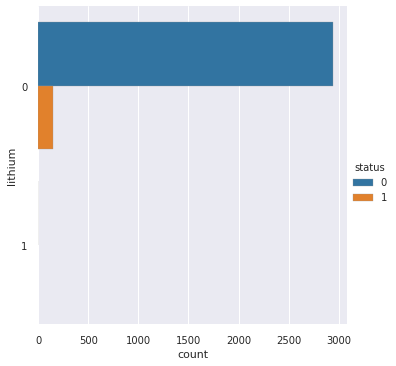

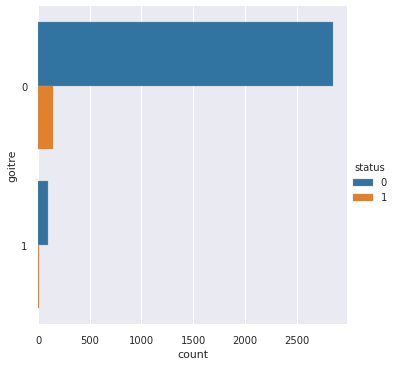

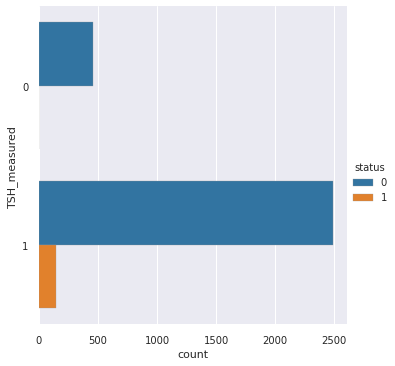

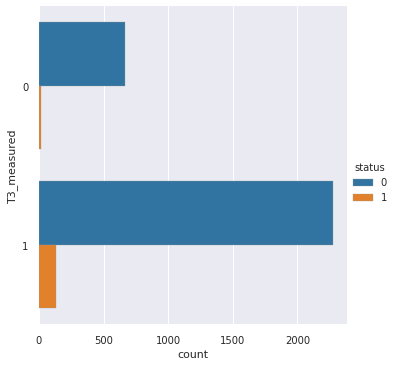

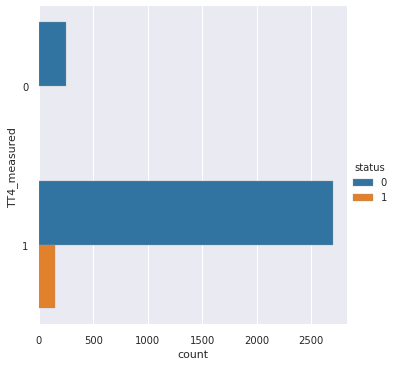

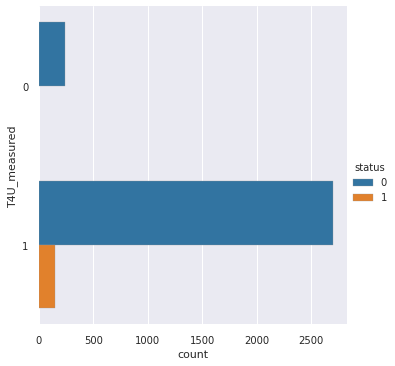

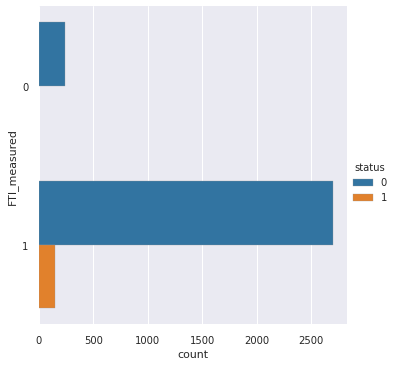

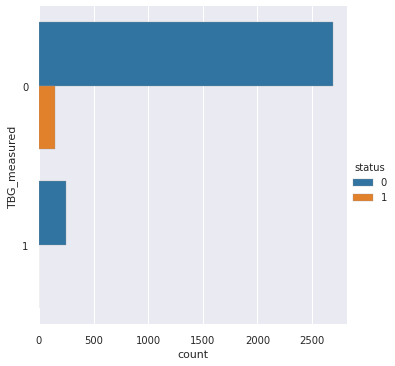

In [ ]:
# plotting cat plots
sns.set_style('darkgrid')

fig, axes = plt.subplots(len(categorical_columns), figsize=(15, 10))
# we will set the hue to be the status column as this is our target variable
for var, subplot in zip(categorical_columns, axes.flatten()):
  sns.catplot(y=var, kind="count", hue="status", edgecolor=".6", data=hypothyroid, ax=subplot);


In [ ]:
# status vs numerical variables
numerical_df = hypothyroid.drop(['sex','age','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
                                 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
                                 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'],
                                 axis = 1)


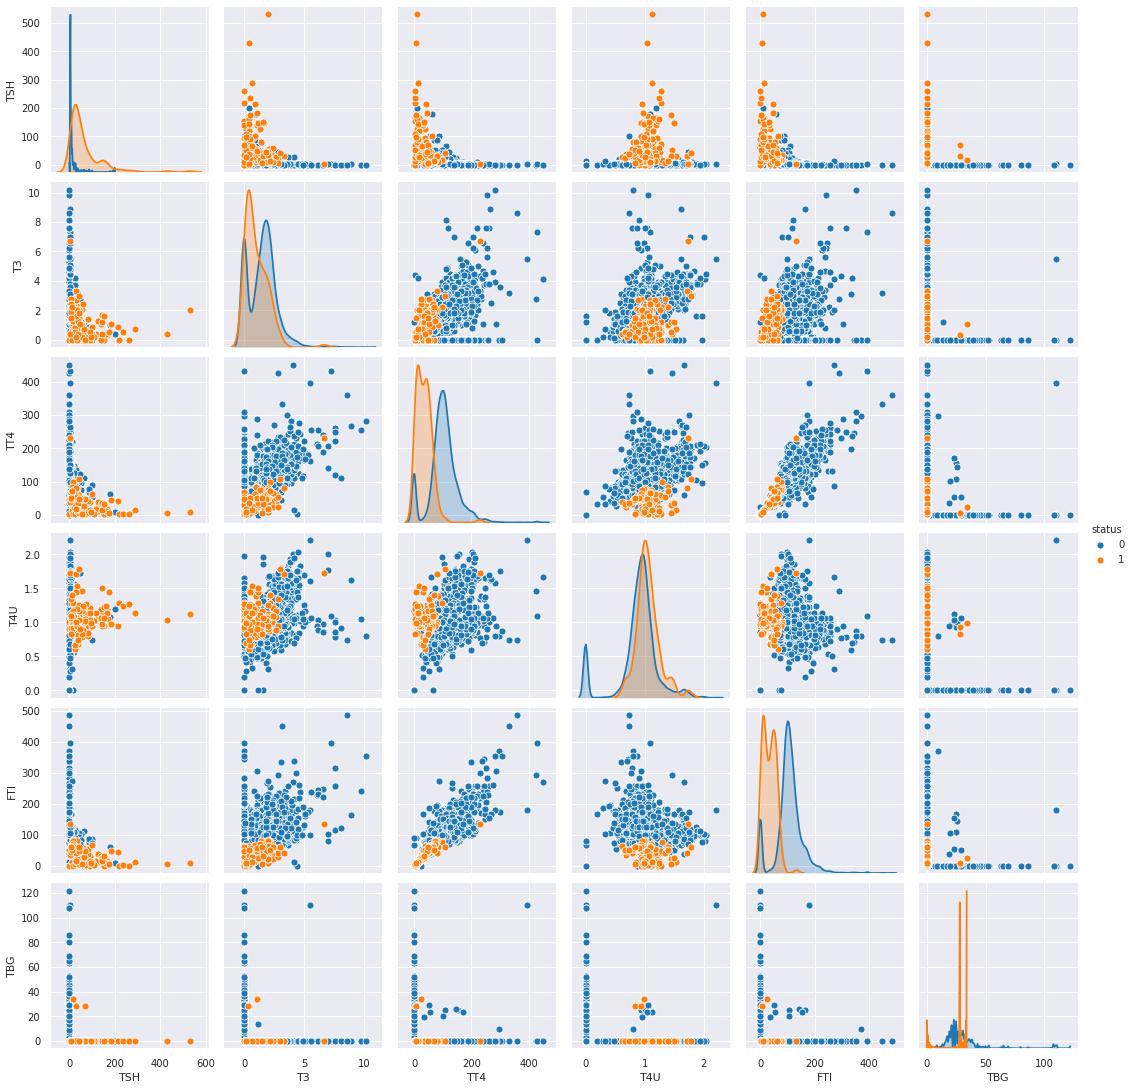

In [ ]:
# plotting scatter plots for the numerical columns and adding status as the hue to distinguish 
# the people who have hypothyroid and those who don't 
sns.pairplot(numerical_df, hue="status")


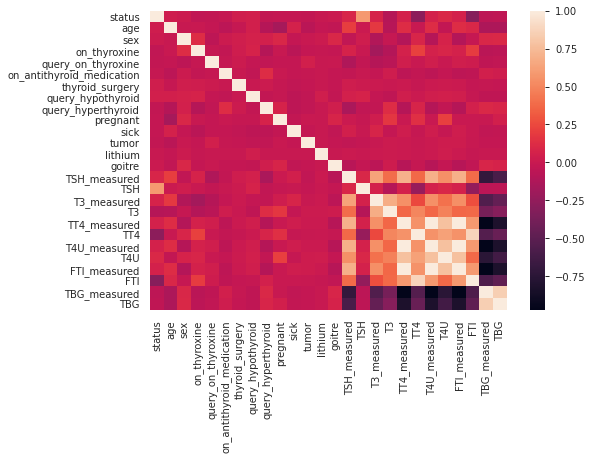

In [ ]:
# correlation matrix

sns.heatmap(hypothyroid.corr())




As had been stated from the pandas profiling, the columns TSH_measured TT4_mesured, T4U_measured and FTI_measured are highly correlated. This could be attributed to the fact that they are all related to the thyroid and they all perform different functions that support each other.

##5. Baseline Model

Our baseline model will be a Binomial logistic regression. We want to classify the individuals/patients into two categories i.e whether the patient will test positive for hypothyroidism or whether they will test negative for hypothyroidism based on all the explanatory variables we have. 

In [36]:
# necessary imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [ ]:
# splitting data into dependent and independent variables
A = hypothyroid.drop('status', axis = 1)
b = hypothyroid['status']          #the status of the individuals is our dependent variable


# splitting data into train and test sets with training sets of 80 
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2, random_state = 0)

# fitting our model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(A_train, b_train)

# using our model to make a prediction
b_pred = LogReg.predict(A_test)

In [ ]:
# evaluating the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix = confusion_matrix(b_test, b_pred)
print(confusion_matrix)
print('Accuracy', accuracy_score(b_test, b_pred))

# assessing the mean squared error 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred)))

[[593   0]
 [  7  19]]
Accuracy 0.9886914378029079
Root Mean Squared Error: 0.10634172368873886


593 and 19 are the number of corret predictions and 7 and 0 are the number of incorrect predictions, hence the number of correct predictions are dominating

The RMSE score is 0.10 which is relatively high

The accuracy score is 98.8%, which is quite high. This means that the model is overfit and that it will not perform well with new data.

Hence we employ other models and assess how they will perform in comparison to the baseline model.

##6. Decision Trees

Decison trees are a non-parametric supervised learning method used for classification and regression. They pick a feature from the dataset that meaningfully splits the data, then actively splits the the data into nodes based on the information gain from splitting the features. The splitting stops when there is no more information gained from splitting a particular feature. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

In this study, decision trees learn from data whether to classify a patient as having hyperthyroidism or not with a set of decision rules from the data features. 

In [37]:
# Split the independent and dependent variables
# our dependent variable is the status of the patient as we want to test whether the 
# patient has hyperthyroidism or not
f = hypothyroid['status'].values

# we will use all the independent variables in the dataset and store them in the test features variable
test_features = hypothyroid.columns.to_list()
test_features.remove('status')

E = hypothyroid[test_features].values

# split the data into train and test sets, using 80% of the data.
E_train, E_test, f_train, f_test = train_test_split(E, f, test_size=0.2, random_state=0)

We will first create a model without any settings or limitations, then include some settings to assess how they affect our model. We will set a max_depth and minimum samples split.

In [38]:
# creating the model
from sklearn.tree import DecisionTreeClassifier

# we will first 
tree = DecisionTreeClassifier()
# tree = DecisionTreeClassifier(max_depth=5, min_samples_split = 20)

# train it with our training set
tree = tree.fit(E_train, f_train)

# predict based on the model we've created
f_pred = tree.predict(E_test)

# printing the accuracy score 
print('Accuracy:', metrics.accuracy_score(f_test,f_pred))

# And now we assess the errors
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(f_test, f_pred)))

Accuracy: 0.9838449111470113
Root Mean Squared Error: 0.12710267051871368


What changes does the parameters make to the model?

*   The model without any settings/limitations has an accuracy score of 98.22% 
*   Limiting the maximum depth increases the accuracy of the model i.e a maximum depth of 5 has an accuracy score of 98.7% while a maximum depth of 3 has an accuracy score of 99.1%. This means that the deeper the tree, the more complex the decision rules and the fitter the model
*   Specifying the sample split also increases the accuracy of the model. i.e a sample split of 10 has an accuracy score of 98.0% while a sample split of 20 has an accuracy score of 99.33%
*   The conclusion from using both the min_sample_split and max_depth is that using a deeper tree and less samples result into a fitter model.
*   The RMSE score is 0.133 which is slightly higher than the baseline model hence this model has performed worse than the baseline model

For visualization, we will not limit the tree to any depth or minimu splits.

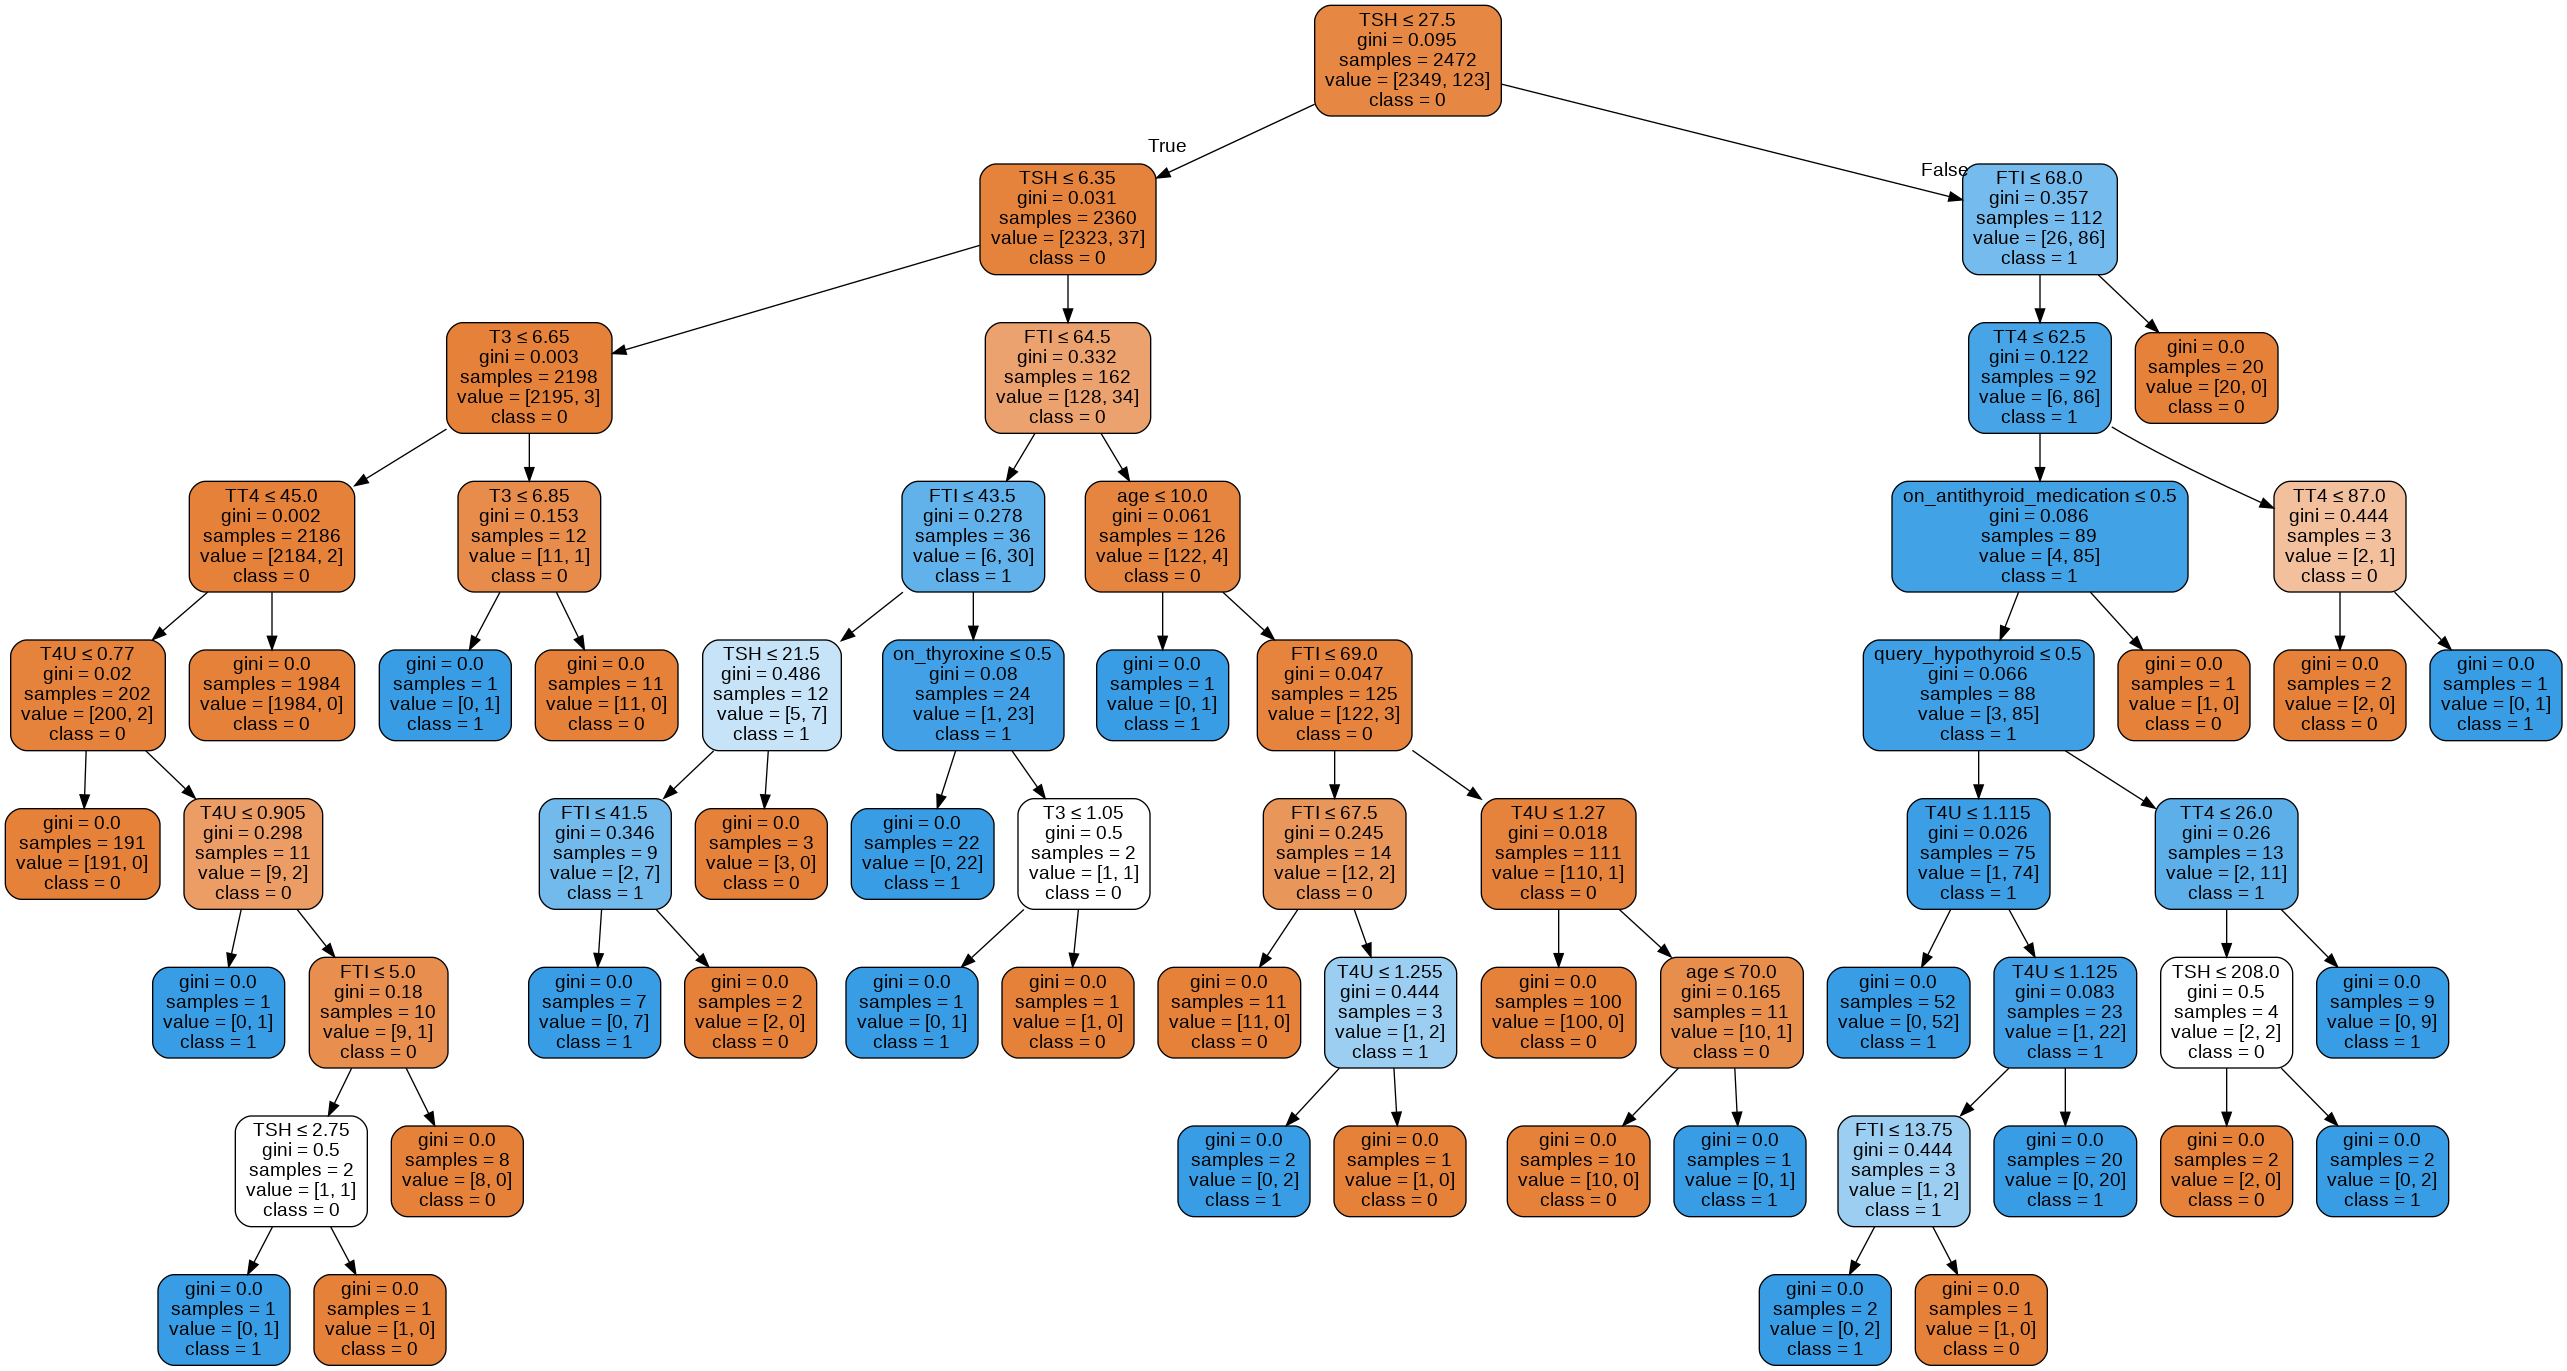

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names = ['0', '1'] )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism.png')
Image(graph.create_png())

**Observations**

The first test is based on the TSH levels i.e are the levels of TSH in the patient less than or equal to 27.5 or are they greater than this? From this split, we obtained samples [2349, 123] this means that patients with TSH levels less than or equal to 27.5 are the majority(2349) while patients with TSH levels greater than 27.5 were the minority hence the root node has a class of patients who tested negative for hypothyroidism. From this, we therefore note that the left side of the tree was dominated by patients who tested nebative for hypothyroidism while the right side is dominated by patients who tested positive for the desease. We observe that most of the splits were made by the levels of hormones hence the decisions were influenced most by hormone levels as compared to the gender and age of the patients.

**Conclusion** 

*   A clear advantage we have been able to see is that we've been able to clearly understand and interpret this tree as we could visualize how the decisions were made.
*   This specific tree was complex and too huge, hence it is necessary to employ mechanisms such as setting a minimum number of samples and setting a maximum depth to avoid this problem.
*   The tree resulted to an overfit model that would not handle new data too well.
*   Another advantage that we did not have to normalise our data to make use of the decision trees. This is because the decision trees require minimum data preparation. 

##7.  Random Forests

Random Forest is a bagging technique that creates multiple random decision trees that are all independent of each other and combine their overall performance to make predictions. The random trees (sub-trees) each train on a random subset of data and uses a random subset of the features hence these mechanisms result to a better fit. As we have observed that our decision tree resulted to an overfit model, we will use random forests to try and alleviate this over-fitting.

In [57]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = hypothyroid['status'].values

test_features = hypothyroid.columns.to_list()
test_features.remove('status')

X = hypothyroid[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier
# To obtain a deterministic behavior during fitting, we will fix the random state to 60
# We will alter the parameter n_estimators to see the effect this parameter has on our model
#we will set min_samples_split and max_depth as we don't want an over-complex tree.
forest = RandomForestClassifier(n_estimators = 100, random_state=60, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()



Actual   Predicted
count  619.000000  619.000000
mean     0.042003    0.033926
std      0.200759    0.181184
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      1.000000    1.000000

In [58]:
# assessing the model using the root mean squared error
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.10634172368873886


**Observations**

With 100 number of trees, the RMSE is 0.106, when we reduce the number of trees to 50, the RMSE increases a bit to 0.113. When we increase the number of trees to 200, the RMSE score does Not change, it remains as 0.113. This means that for this particular model the forest with 100 trees worked better 

In general, the random forest with has performed better than the individual decision trees but not better than our baseline model.

We will visualize two trees to obseve the difference between the two trees

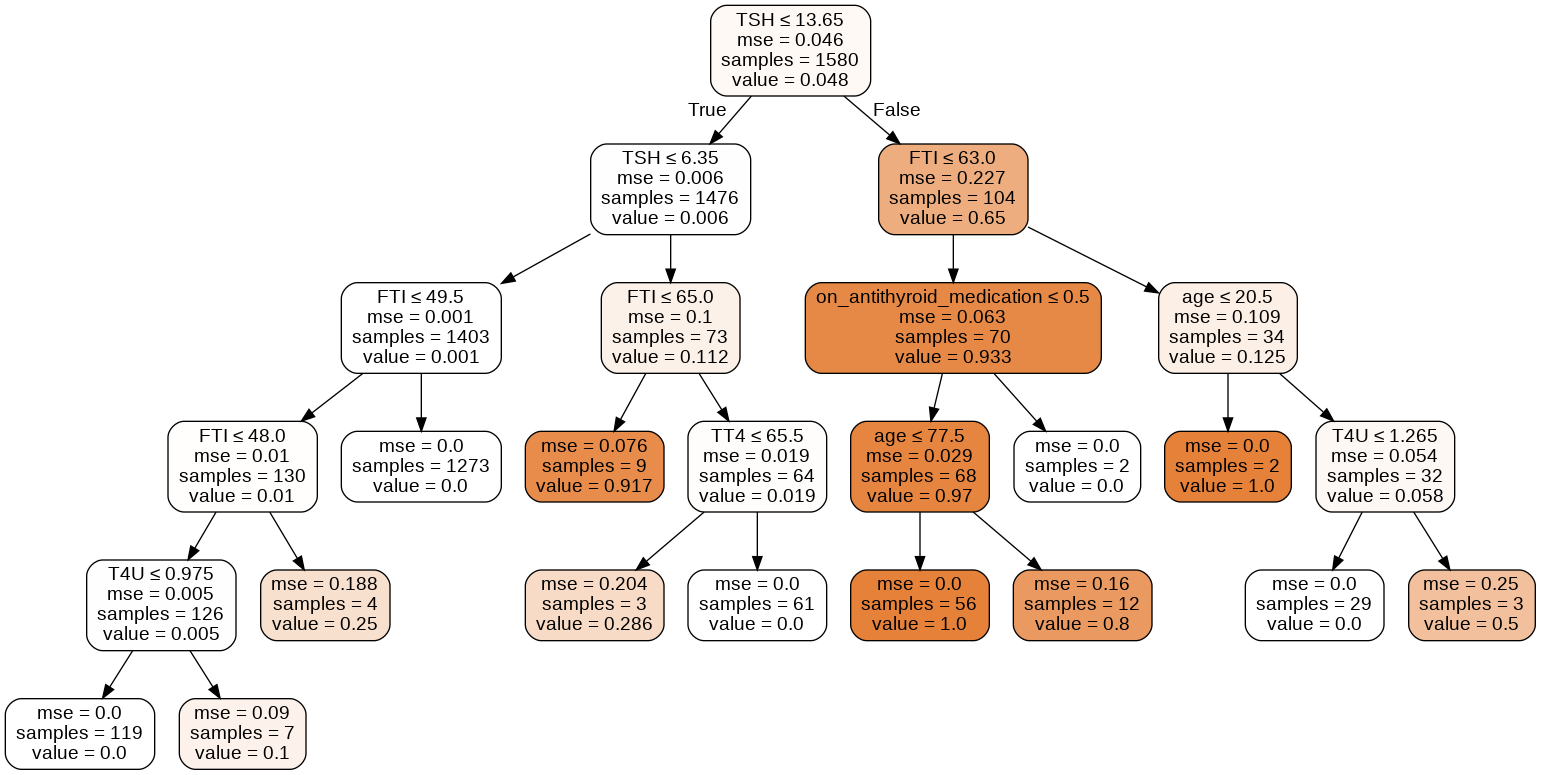

In [ ]:
# lets vizualize the 100th tree as our model has 200 trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[100]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

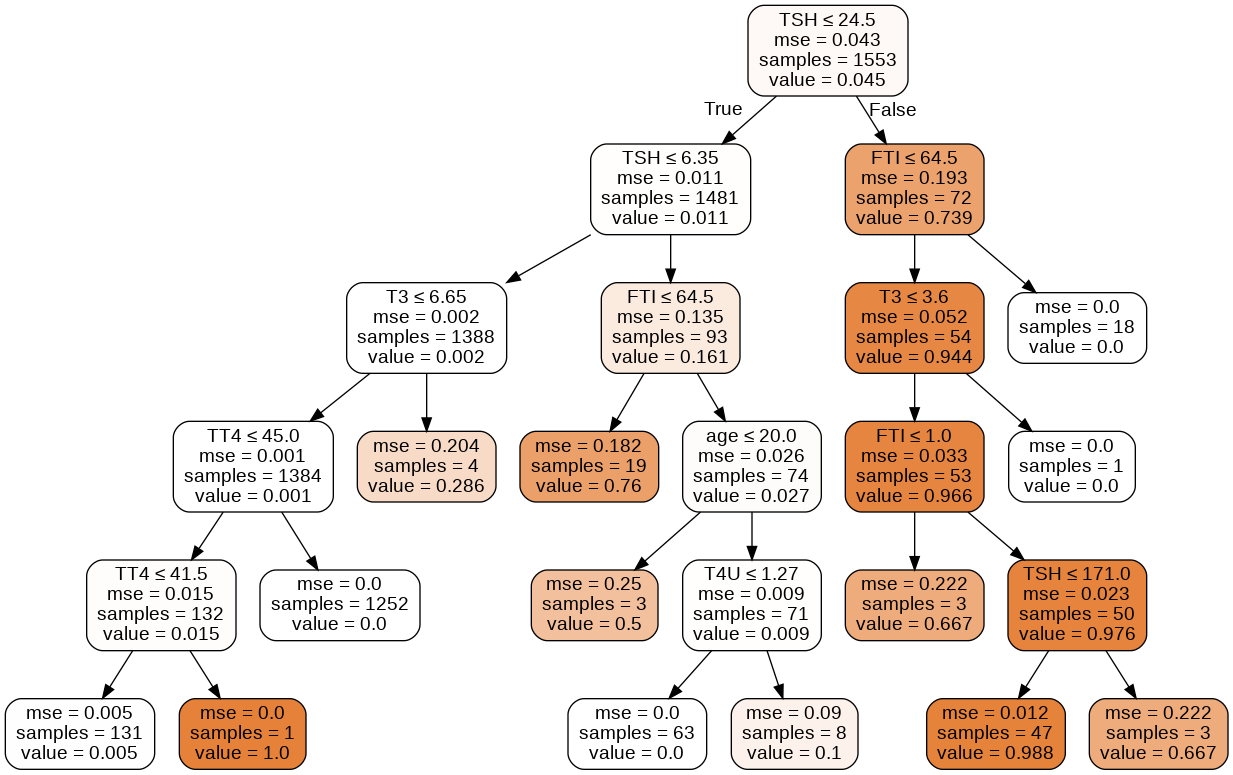

In [ ]:
# visualizing the 50th tree
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

**Observations**

From both trees, the first test is on the TSH levels, this means that the feature is very influential in making a decison. The features are not consistent in both trees e.g we observe the feature _on_anti_thyroid_medication_ in the first tree but not in the second tree. Hence the trees have differences in features and tests in the different nodes.


In [42]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# We will sort the values in descending order, so we can see the most important features first since we care about the most important features.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.59), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.02), ('FTI_measured', 0.0), ('FTI', 0.33), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.59
Variable: FTI                  Importance: 0.33
Variable: age                  Importance: 0.03
Variable: T4U                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Varia

**Observations**

The following are the most important features with their importance:

Variable: TSH                  Importance: 0.59
Variable: FTI                  Importance: 0.33
Variable: age                  Importance: 0.03
Variable: T4U                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TT4                  Importance: 0.

The hormone TSH has has the highest importance as compared to the rest of the features, this means that it is the most contributor to a person testing positive for hypothyroidism or not. This is followed by FTI, age, T4U, on_antithyroid_medication, T3, and TT4. All the other features don't have influence to the status of an indvivual as much. Hence we only need these five features to predict the status of a patient.

Obtaining a visualization of the variable feature importance.

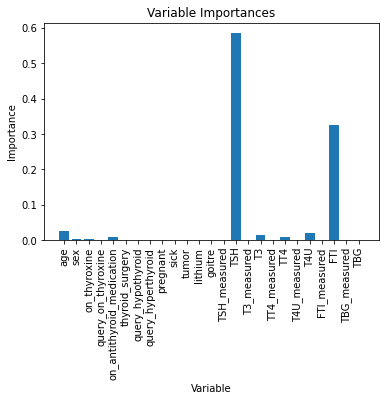

In [43]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Key take-aways from the Random Forests**

We have seen that the random forests was a better model for our data as compared to the individual trees, however, we stated earlier that the Random forests gets predictions from all the the sub-trees (models) then average the results. This means that each tree has an equal vote on the final classification regardless of the size of the tree. This could be one disadvantage of this model. 

##8. Ada-Boost

Ada Boost is a Boosting technique that aims to alleviate over-fitting. We combine Ada Boost with decision trees.
We wil use Ada Boost to assess if it will be a better model as it has the following advantages over Random Forests.

1. Unlike in Random Forests where each tree has an equal vote on the final classification,forests of stumps made with Ada Boost stumps have more say in the final classification than others i.e larger stumps have more say in the final classification than smaler stumps.  
2. In Random forests, each decison tree is made independently of the others while in Adaboost, the order is important in that the error the first stump makes influence how the second stump is made.


In [ ]:
# Split the independent and dependent variables
# our dependent variable is the status of the patient as we want to test whether the 
# patient has hyperthyroidism or not
# n= hypothyroid["status"].values.reshape((3091,1))

# we will use all the independent variables in the dataset and store them in the test features variable
# test_features = hypothyroid.columns.to_list()
# test_features.remove("status")

# M = hypothyroid[test_features].values

# split the data into train and test sets, using 80% of the data.
# M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state=0)

In [45]:
# splitting data into dependent and independent 
M = hypothyroid[['age', 'sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery',
                 'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH',
                 'T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']]
n = hypothyroid['status']


# splitting data into train and test sets
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size = 0.2, random_state = 0)

from sklearn.ensemble import AdaBoostClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=200, random_state=60)
# fitting the model to our train data
ada_boost = ada_boost.fit(M_train, n_train)

# making predictions
n_pred_ada = ada_boost.predict(M_test)

# assessing the model  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(n_test, n_pred_ada)))


Root Mean Squared Error: 0.08987516023070193


In order to make the most out of the Ada Boost, we will change the parameters to see how this affects our model.

**How does changing the maximum depth affect our model?** 

With a constant number of stumps i.e 300 in this case, setting the max depth to 4 using 200 number of stumps we get RMSE of 0.18. Increasing the max_depth to 5 reduces the RMSE to 0.09 and a further increase of the max_depth to 7 also reduces the RMSE to 0.087. This means that a deeper stump gets us a better model but could lead to overfitting. Reducing the maximum depth to 3 results to a RMSE score of 0.13.

**How does changing the number of stumps affect the model?**

Setting a constant max depth of 3, using 100 number of stumps results to RMSE score of 0.13, reducing the number of stumps to 50 we still get RMSE of 0.13 and with 300 trees the RMSE is still the same. Hence the number of stumps does not affect the model
With a deeper stump of depth 7 and 200 number of stumps results to a RMSE score of 0.087 increasing the number of stumps to 300 still results to RMSE score of 0.087 which remains the same even with 400 number of stumps. When we reduce the number of stumps to 100, the RMSE increases a little to 0.089.

In conclusion, we need to ensure the depth of the stumps is not too deep to lead to over fitting and that the number of stumps is not too little to lead to a worse model. Hence we will set the max depth to 5 and have 200 number of stumps. This results to a RMSE score of 0.089.

In [46]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(M, importances)]

print(feature_importances)
print()

# We will sort the values in descending order, so we can see the most important features first since we care about the most important features.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.59), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.02), ('FTI_measured', 0.0), ('FTI', 0.33), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.59
Variable: FTI                  Importance: 0.33
Variable: age                  Importance: 0.03
Variable: T4U                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Varia

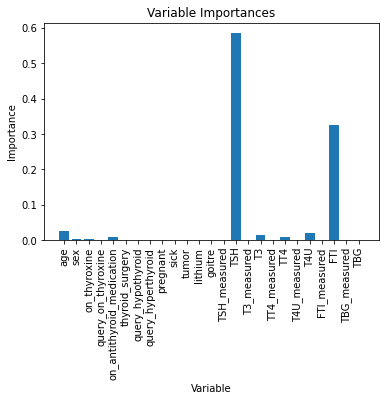

In [47]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, M, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The following is the list of the features along with their importance from the Ada Boosted Tres:

Variable: TSH                  Importance: 0.59
Variable: FTI                  Importance: 0.33
Variable: age                  Importance: 0.03
Variable: T4U                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TT4                  Importance: 0.01

**Conclusion from both models** 

From both models, the most important feature is the TSH hormone which is by far the most important feature as compared to the rest. 

In general, the Ada Boost has a lower RMSE score as compared to the Random Forest hence it's the better fit. Both models displayed the same features that are of importance and with the same degree. I prefer the Ada Boost for this particular dataset. 



##9. Support Vector Machine

SVM is often used for classification best suited for more extreme cases. SVM separates classes using the best hyperplane that maximizes the distance between the data points of the different classes. (margin). It is necessary to maximize the margin to avoid the risk of misclassification. The objective of SVM is to find a hyperplane in an N-dimensional space that distinctively classifies the data points. 

SVM optimization occurs by minimizing the decision vector, hence, the optimal hyperplane is influenced by the scale of the input features and it’s therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training. Hence, we will use the MinMaxScaler to scale our data.

**Why MinMaxScaler?**

1. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range(difference between the original maximum and original minimum)  
1.  MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data. As all the columns have a different distribution, we would not want to change this 
1.  MinMaxScaler doesn’t reduce the importance of outliers. As we are dealing with a medical problem, outliers are actually very important in making decisions as that is what defines whether a patient is likely to have the desease or not
1.  The default range for the feature returned by MinMaxScaler is 0 to 1 as is recommended for SVM optimization

From the Ada Boost classifier above, we have seen that the most important features are the TSH, FTI, on_antithyroid_medication, age, on_thyroxine, T3 and TT4. Hence, we will use the SVM to classify each of these hormones.

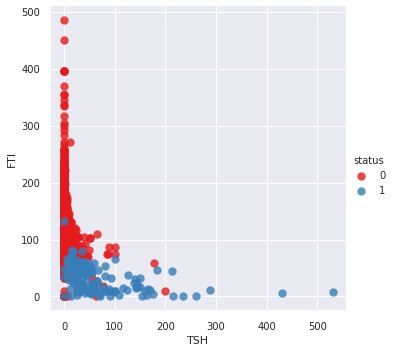

In [ ]:
# plotting TSH and FTI which are the most important features to see if they are applicable for SVM

sns.lmplot('TSH', 'FTI', data=hypothyroid, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

We can clearly see that people who tested negative for hypothyroidism have high levels of FTI hormones and low levels of TSH hormones. However, people who tested positive for hypothyroidism have high levels of TSH hormones and low levels of FTI hormones.

In [ ]:
# creating our dependent and independent variables
T = hypothyroid[["TSH", "FTI"]].values
s = hypothyroid["status"].values

#  Split the data into train and test set with train sex being 80%
T_train, T_test, s_train, s_test = train_test_split(T, s, test_size = 0.2, random_state = 0)

# performing MinMax Scaler to scale our feature set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
T_train = scaler.fit_transform(T_train)
T_test = scaler.transform(T_test)


### Fitting a linear svm model

In [ ]:
# build the svm model 
hypothyroidism_model = SVC(kernel = 'linear')

# Train the model using the training set
hypothyroidism_model.fit(T_train,s_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

####Visualization

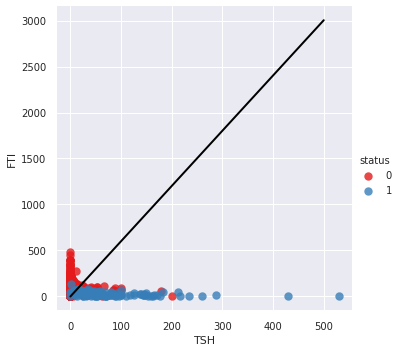

In [ ]:
# Get the separating hyperplane
w = hypothyroidism_model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. 
#We create a range numbers from the highest to the lowest TSH levels recorded 
xx = np.linspace(0, 500)
yy = a * xx - (hypothyroidism_model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TSH', 'FTI', data=hypothyroid, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

We observe that some of the observations have been misclassified.

#### Model Performance

In [ ]:
# Predict the response for the test set
s_pred = hypothyroidism_model.predict(T_test)
# s_pred

# Checking the accurancy of the model
model_accuracy = accuracy_score(s_test,s_pred)
print(model_accuracy)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(s_test, s_pred)))
# checking the confusion matrix
# confusion_matrix = confusion_matrix(s_test, s_pred)
# confusion_matrix

The RMSE score is 0.192 which is quite high 

The linear model has an accuracy of 96.4% which is quite a high accuracy, with [593,4] number of correct predictions and [22,0] number of incorrect predictions.

###Fitting a polynomial SVM model

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=1)

# Training the model using the training set
polyclassifier.fit(T_train, s_train)

####Making prediction

In [ ]:
# Predict the response for the test set
poly_pred = polyclassifier.predict(T_test)
# poly_pred

####Model evaluation

In [ ]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(s_test,poly_pred)
print(model_accuracy)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(s_test, poly_pred)))

With a polynomial of degree 3, The polynomial SVM has an accuracy of 96.2% and a RMSE score of 0.192 which is the same same accuracy as the linear model. 

With a polynomial of degree 1, the accuracy score increases to 97.57% while the RMSE score reduces to 0.155. This is an indication that the polynomial svm model is a better fit for the data as compared to the linear model

### Fitting the model: Radial Basis Function

In [ ]:
# Let's now build the svm model 
rbfclassifier = SVC(kernel = 'rbf')

# Train the model using the training set
rbfclassifier.fit(T_train,s_train)

# Predict the response for the test set
rbf_pred = rbfclassifier.predict(T_test)
# s_pred

# Checking the accurancy of the model
model_accuracy = accuracy_score(s_test,rbf_pred)
print(model_accuracy)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(s_test, rbf_pred)))


The accuracy score has increased to 98.5% and the RMSE score has reduced to 0.12 hence of all the three kernels we have chosen, the rbf has performed the best.

##10. Advanced SVM

Using the rbf, we will now add an additional feature, _on_antithyroid_medication_ and see how the model will perform with an additional feature

As we are now dealing with multiple classes, we will make use of the kernel trick and the parameters gamma and C of the Radial Basis Function (RBF) kernel SVM to illustrate the effect of these parameters then use a grid to search for the best parameters that will optimize the model.

In [48]:
# creating dependent and independent variables

H = hypothyroid[["TSH", "FTI", "on_antithyroid_medication"]].values
g = hypothyroid["status"].values


# splitting the variables to train and test sets
H_train, H_test, g_train, g_test = train_test_split(H, g, test_size = 0.2, random_state = 0)

# performing MinMax Scaler to scale our feature set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
T_train = scaler.fit_transform(H_train)
T_test = scaler.transform(H_test)

In [49]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set
rbfclassifier.fit(H_train, g_train)

# Predict the response for the test set
g_pred = rbfclassifier.predict(H_test)

# assessing the model
# Checking the accurancy of the model
model_accuracy = accuracy_score(g_test,g_pred)
print(model_accuracy)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(g_test, g_pred)))

0.9854604200323102
Root Mean Squared Error: 0.12058018065872111


Adding the _on_antithyroxine_medication_ feature has not changed the performance of our model at all, we still have an accuracy of 98.5%. We now try to use the parameters to see what effect they have on our model.

In [50]:
# Building the model 
rbfclassifier_tuned = SVC(kernel='rbf', gamma=0.01, C=2.0)

# Training the model using the training set
rbfclassifier_tuned.fit(H_train, g_train)

# Predict the response for the test set
g_pred = rbfclassifier_tuned.predict(H_test)

# assessing the model
# Checking the accurancy of the model
model_accuracy = accuracy_score(g_test,g_pred)
print(model_accuracy)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(g_test, g_pred)))

0.9919224555735057
Root Mean Squared Error: 0.08987516023070193


**How does changing C affect the model?**

Setting C to 0.05 instead of 1.0 has lowered the performance of the model to an accuracy of 97.5% while increasing C to any higher number does not have any effect to the performance of the model, the accuracy still remains at 98.5% as before. Hence setting C to 1.0 gives the optimal solution.

**How does gamma affect the model?**

We will set C to the default value 1.0 and change the gamma to observe the effect it will have to the model. Setting gamma to 0.05 results to a lower accuracy of 97.89% and also increases the RMSE score slightly to 0.14. Increasing gamma to 1 lowers the accuracy score to 95.9% and also increases RMSE to 0.2. However, lowering the gamma to 0.01 results to an accuracy of 99.0% and a minimal RMSE score of 0.098. This means that a small value of gamma gave better results for this particular model.

Setting C to 2 and gamma to 0.01 results to an accuracy of 99.1% and a RMSE score of 0.089 which is the best combination we have so far!


####Visualization

In [ ]:
# X = H, y = g, model = rbfclassifier_tuned

#  Create a mesh grid for our graph
# def make_meshgrid(x, y, h=.02):
    # x_min, x_max = x.min() - 1, x.max() + 1
    # y_min, y_max = y.min() - 1, y.max() + 1
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # return xx, yy

# A function that creates the hyperplanes from our model
# def plot_contours(ax, clf, xx, yy, **params):
    # Z = rbfclassifier_tuned.predict(np.c_[xx.ravel(), yy.ravel()])
    # Z = Z.reshape(xx.shape)
    # out = ax.contourf(xx, yy, Z, **params)
    # return out

# fig, ax = plt.subplots()
# title for the plots
# title = ('Hypothyroidism classification with rbf SVC')
# Set-up grid for plotting.
# X0, X1 = H[:, 0], H[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, rbfclassifier_tuned, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
# ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# plt.show()

We will now introduce the other important features obtained from the Ada Boost and search for the best parameters from a grid

In [ ]:
# creating dependent and independent variables

# Variable: TSH Importance: 0.54
# Variable: FTI Importance: 0.4
# Variable: on_antithyroid_medication Importance: 0.02
# Variable: age Importance: 0.01
# Variable: on_thyroxine Importance: 0.01
# Variable: T3 Importance: 0.01
# Variable: TT4 Importance: 0.01



R= hypothyroid[["TSH", "FTI", "on_antithyroid_medication", "age", "on_thyroxine", "T3", "TT4"]].values
q = hypothyroid["status"].values


# splitting the variables to train and test sets
R_train, R_test, q_train, q_test = train_test_split(R, q, test_size = 0.2, random_state = 0)

In [ ]:
# searching for the best parameters using grid
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel ="rbf"), param_grid=param_grid, cv=cv)
grid.fit(R_train, q_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
# assessing the error
# Predict the response for the test set
q_pred = grid.predict(R_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(q_test, q_pred)))

Using a grid search, the best parameters are a very large C and a small gamma gives an accuracy of 99%. The RMSE score is however quite large as compared to the previous models indicating that this model did not do too well. We therefore conclude that this model is overfit which could be attributed to the huge value of C obtained.

##11. Challenging the Solution

We have built the following models:

    *Random Forests, Ada boost and SVM *

with an attempt to classify patients with hypothyroidism and those without. From the Random Forest, we attained RMSE score of 0.106 while from the Ada Boost we attained RMSE score of 0.089. These are relatively low scores however the Ada Boost was a better fit. We also used the two models to get the most important features that contribute to having hypothyroidism. From this, we obtained very few features that actually influenced the status of a patient i.e out of all 25 independent variables, we got only 9 variables that influenced the dependent variable. This may be attributed to the fact that most of the variables with hormone levels were actually not measured and as a result had more 0 values hence the models did not gain enough information to make the correct decisions. To correct this situation, it would probably be a good idea to have actual values and not zeros hence probably imputing the null values with either the mean, median or mode values of those columns.  
From the SVM model, we obtained almost similar results high accuracies with low RMSE scores which implies that the model is a good fit for the data.

##12. Follow up questions

From our objectives and metrics for success, we can consider this study a success. However, the accuracy scores were too high hence implying that our models are too good a fit hence probes the question, how well would our models perform with new data? 

From the data preparation process, we had too many null values that we chose to impute with zeros. However, how did this zeros inform our models? They probably misled the models. Is there a possibility that our model could have performed better if we had dropped the null values? Or could it have performed worse? Or would that mean we would not have enough data to train the models?